## Описание алгоритма градиентного спуска

Данный код реализует алгоритм градиентного спуска для аппроксимации функции: $$f(x) = 0.1 \cdot x^2 - \sin(x) + 5$$ на интервале $[-5, 5]$ моделью вида: $$a(x) = w_0 + w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot x^3$$

**Цель:** Найти вектор параметров $w = [w_0, w_1, w_2, w_3]^T$, минимизирующий функционал качества $Q(w)$.

**Алгоритм градиентного спуска:**

Параметры $w$ обновляются итеративно по следующей формуле:

$$w_n = w_{n-1} - \eta \cdot \frac{\partial Q(w)}{\partial w}$$

где:
- $w_n$ - вектор параметров на текущей итерации.
- $w_{n-1}$ - вектор параметров на предыдущей итерации.
- $\eta$ - шаг обучения (learning rate).
- $\frac{\partial Q(w)}{\partial w}$ - градиент функционала качества по вектору параметров $w$.

**Градиент функционала качества:**

Градиент может быть записан в векторно-матричном виде:

$$\frac{\partial Q(w)}{\partial w} = \frac{2}{n} \cdot X^T \cdot (Xw - f_x)$$

где:
- $X$ - матрица признаков, где каждая строка соответствует точке $x_i$, а столбцы содержат $[1, x_i, x_i^2, x_i^3]$.
- $Xw$ - вектор предсказаний модели.
- $f_x$ - вектор истинных значений функции.

**Реализация в коде:**

1. Инициализируются начальные значения параметров $w$ и шаги обучения $\eta$.
2. Создается матрица признаков $X$.
3. В цикле, выполняющем $N$ итераций:
    - Вычисляется градиент функционала качества.
    - Параметры $w$ обновляются с учетом шага обучения.
4. После завершения итераций, вычисляется и выводится итоговое значение функционала качества $Q$.

**Функционал качества (среднеквадратичная ошибка):**

$$Q(w) = \frac{1}{n} \cdot \sum_{i=1}^{n} (a(x_i) - f(x_i))^2$$

где:
- $n$ - количество точек в выборке.
- $a(x_i)$ - значение модели в точке $x_i$.
- $f(x_i)$ - истинное значение функции в точке $x_i$.

[[ 4.98645739]
 [-0.41780964]
 [ 0.10273088]
 [ 0.0317247 ]]
0.13061463936073706


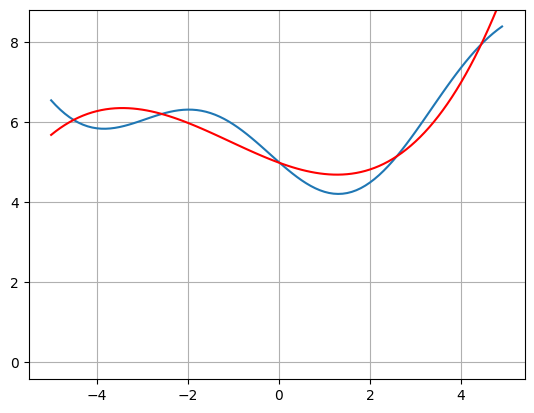

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.


# здесь объявляйте необходимые функции

coord_x = np.arange(-5.0, 5.0, 0.1).reshape(-1,1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x).reshape(-1,1) # значения функции по оси ординат

sz = len(coord_x)       # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]).reshape(-1,1) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([.0,.0, .0,.0]).reshape(-1,1) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма
X = np.hstack((np.ones((coord_x.shape[0],1)),coord_x,coord_x**2,coord_x**3))
fx = coord_y

plt.ion()
fig, ax = plt.subplots()

ax.grid(True)
ax.plot(coord_x, coord_y)
approx = ax.plot(coord_x, X @ w, c="red")[0]

for _ in range(N):
    gradient = 2/sz * X.T @ (X@w - fx)
    w -= eta * gradient

    approx.set_ydata(X @ w)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)


Q = np.mean((X@w - fx)**2)
print(w)
print(Q)
plt.ioff()
plt.show()